In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("cars24_data.csv")

In [3]:
df.head()

,Unnamed: 0,Car Name,Price,EMI,Features,Location,Car Brand,Model,Model Year,Gear,Driven (Kms),Ownership,Fuel,EMI (monthly)
0,0,2016 Maruti BalenoZETA 1.2 K12 Manual,"6,21,899","â‚¹13,834/month","1,03,354 km\n1st Owner\nPetrol",Hyderabad,Maruti,['BalenoZETA 1.2 K12'],2016,['Manual'],"1,03,354",1,Petrol,"13,834"
1,1,2015 Honda Jazz1.2 V AT Automatic,"5,24,199","â‚¹11,661/month","65,571 km\n2nd Owner\nPetrol",Hyderabad,Honda,['Jazz1.2 V AT'],2015,['Automatic'],"65,571",2,Petrol,"11,661"
2,2,2012 Maruti SwiftZDI Manual,"4,76,699","â‚¹10,604/month","78,819 km\n2nd Owner\nDiesel",Hyderabad,Maruti,['SwiftZDI'],2012,['Manual'],"78,819",2,Diesel,"10,604"
3,3,2016 Maruti Alto 800LXI Manual,"2,95,499","â‚¹6,573/month","20,215 km\n2nd Owner\nPetrol",Hyderabad,Maruti,['Alto 800LXI'],2016,['Manual'],"20,215",2,Petrol,"6,573"
4,4,2010 Hyundai i20SPORTZ 1.2 O Manual,"3,78,299","â‚¹8,415/month","79,222 km\n2nd Owner\nPetrol",Hyderabad,Hyundai,['i20SPORTZ 1.2 O'],2010,['Manual'],"79,222",2,Petrol,"8,415"


# Exploratory Data Analysis (EDA):

In [4]:
df.columns

Index(['Unnamed: 0', 'Car Name', 'Price', 'EMI', 'Features', 'Location',
       'Car Brand', 'Model', 'Model Year', 'Gear', 'Driven (Kms)', 'Ownership',
       'Fuel', 'EMI (monthly)'],
      dtype='object')

# Finding number of "Missing / NAN" values

In [5]:
df.isnull().sum()

Unnamed: 0       0
Car Name         0
Price            0
EMI              0
Features         0
Location         0
Car Brand        0
Model            0
Model Year       0
Gear             0
Driven (Kms)     0
Ownership        0
Fuel             0
EMI (monthly)    0
dtype: int64

# Removing unwanted columns & rearranging wanted columns

In [6]:
cols = ['Car Name', 'Features', 'EMI','Unnamed: 0']
columns = ['Car Brand', 'Model', 'Price', 'Model Year','Location' ,'Fuel', 'Driven (Kms)', 'Gear', 'Ownership', 'EMI (monthly)']
df = df.drop(cols,axis=1)
df = df[columns]

# Cleaning the format of different columns

In [7]:
df['Model'] = df['Model'].apply(lambda x: ''.join(x))
df['Gear']  = df['Gear'].apply(lambda x: ''.join(x))
df['Price'] = df['Price'].apply(lambda x: x.replace(',',''))
df['EMI (monthly)'] = df['EMI (monthly)'].apply(lambda x: x.replace(',',''))
df['Driven (Kms)'] = df['Driven (Kms)'].apply(lambda x: x.replace(',',''))

# Removing duplicated rows

In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
df

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Maruti,['BalenoZETA 1.2 K12'],621899,2016,Hyderabad,Petrol,103354,['Manual'],1,13834
1,Honda,['Jazz1.2 V AT'],524199,2015,Hyderabad,Petrol,65571,['Automatic'],2,11661
2,Maruti,['SwiftZDI'],476699,2012,Hyderabad,Diesel,78819,['Manual'],2,10604
3,Maruti,['Alto 800LXI'],295499,2016,Hyderabad,Petrol,20215,['Manual'],2,6573
4,Hyundai,['i20SPORTZ 1.2 O'],378299,2010,Hyderabad,Petrol,79222,['Manual'],2,8415
...,...,...,...,...,...,...,...,...,...,...
3029,Maruti,['Alto 800LXI'],260499,2014,Chennai,Petrol,39845,['Manual'],3,5795
3030,Maruti,['CiazALPHA 1.3 DDIS SHVS'],691099,2017,Chennai,Diesel,93258,['Manual'],1,15373
3031,Skoda,['RapidStyle 1.5 TDI AT'],1077299,2018,Chennai,Diesel,64861,['Automatic'],1,23964
3032,Renault,['KwidRXT'],369799,2017,Chennai,Petrol,22293,['Manual'],1,8226


# Analysing the Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3034 entries, 0 to 3033
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Brand      3034 non-null   object
 1   Model          3034 non-null   object
 2   Price          3034 non-null   object
 3   Model Year     3034 non-null   int64 
 4   Location       3034 non-null   object
 5   Fuel           3034 non-null   object
 6   Driven (Kms)   3034 non-null   object
 7   Gear           3034 non-null   object
 8   Ownership      3034 non-null   int64 
 9   EMI (monthly)  3034 non-null   object
dtypes: int64(2), object(8)
memory usage: 260.7+ KB


In [11]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033],
           dtype='int64', length=3034)

# Checking Datatype of all columns

In [12]:
df.dtypes

Car Brand        object
Model            object
Price            object
Model Year        int64
Location         object
Fuel             object
Driven (Kms)     object
Gear             object
Ownership         int64
EMI (monthly)    object
dtype: object

# Statistical Summary

In [13]:
df.describe(include='all')

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
count,3034,3034,3034,3034.000000,3034,3034,3034,3034,3034.000000,3034
unique,21,612,2406,NaN,5,4,2987,3,NaN,2406
top,Maruti,['Wagon R 1.0VXI'],466499,NaN,Mumbai,Petrol,19376,['Manual'],NaN,7140
freq,1428,85,10,NaN,1126,2222,2,2417,NaN,10
mean,NaN,NaN,NaN,2016.290705,NaN,NaN,NaN,NaN,1.224127,NaN
std,NaN,NaN,NaN,2.236554,NaN,NaN,NaN,NaN,0.472660,NaN
min,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,1.000000,NaN
75%,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,1.000000,NaN


Some statistical details can't be calculated for object type so it gives 'NaN' values

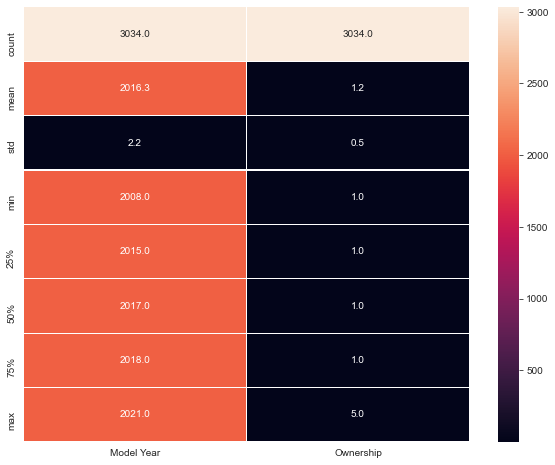

In [14]:
#visualize 
plt.figure(figsize=(10,8))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Analyzing the Target Class

In [15]:
df['Price'].unique()

array(['621899', '524199', '476699', ..., '260499', '691099', '357099'],
      dtype=object)

In [16]:
df['Price'].value_counts()

466499     10
320999     10
299199      7
478599      7
606299      7
           ..
570699      1
1403799     1
738699      1
577299      1
333599      1
Name: Price, Length: 2406, dtype: int64

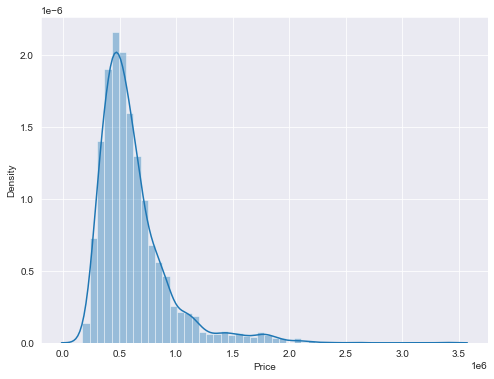

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(df['Price'])
plt.show()

### 1) Total number of cars in different Cities

In [20]:
df.Location.unique()

array(['Hyderabad', 'Delhi', 'Mumbai', 'Bangalore', 'Chennai'],
      dtype=object)

In [21]:
df['Location'].value_counts()

Mumbai       1126
Delhi         674
Chennai       638
Bangalore     478
Hyderabad     118
Name: Location, dtype: int64

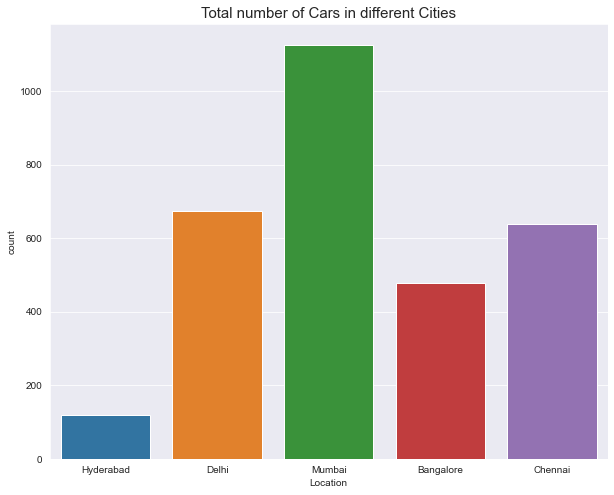

In [22]:
#visualize 
plt.figure(figsize=(10,8))
sns.countplot(df['Location'])
plt.title("Total number of Cars in different Cities",fontsize=15)
plt.show()

### Mumbai           1126

### Delhi                  674
 
### Chennai            638

### Bangalore         478

### Hyderabad        118

#  No. of different Brands in all Cities

In [23]:
df['Car Brand'].unique()

array(['Maruti', 'Honda', 'Hyundai', 'Volkswagen', 'Datsun', 'Renault',
       'Ford', 'Toyota', 'Skoda', 'Tata', 'Nissan', 'Audi', 'KIA', 'BMW',
       'Mercedes', 'Mahindra', 'MG', 'Ssangyong', 'Jeep', 'Jaguar',
       'Fiat'], dtype=object)

In [24]:
df['Car Brand'].value_counts()

Maruti        1428
Hyundai        711
Ford           200
Honda          194
Renault        115
Tata            91
Toyota          80
Volkswagen      75
Mahindra        30
MG              22
Skoda           14
KIA             13
BMW             13
Datsun          13
Nissan          12
Jeep            11
Audi             7
Mercedes         2
Fiat             1
Ssangyong        1
Jaguar           1
Name: Car Brand, dtype: int64

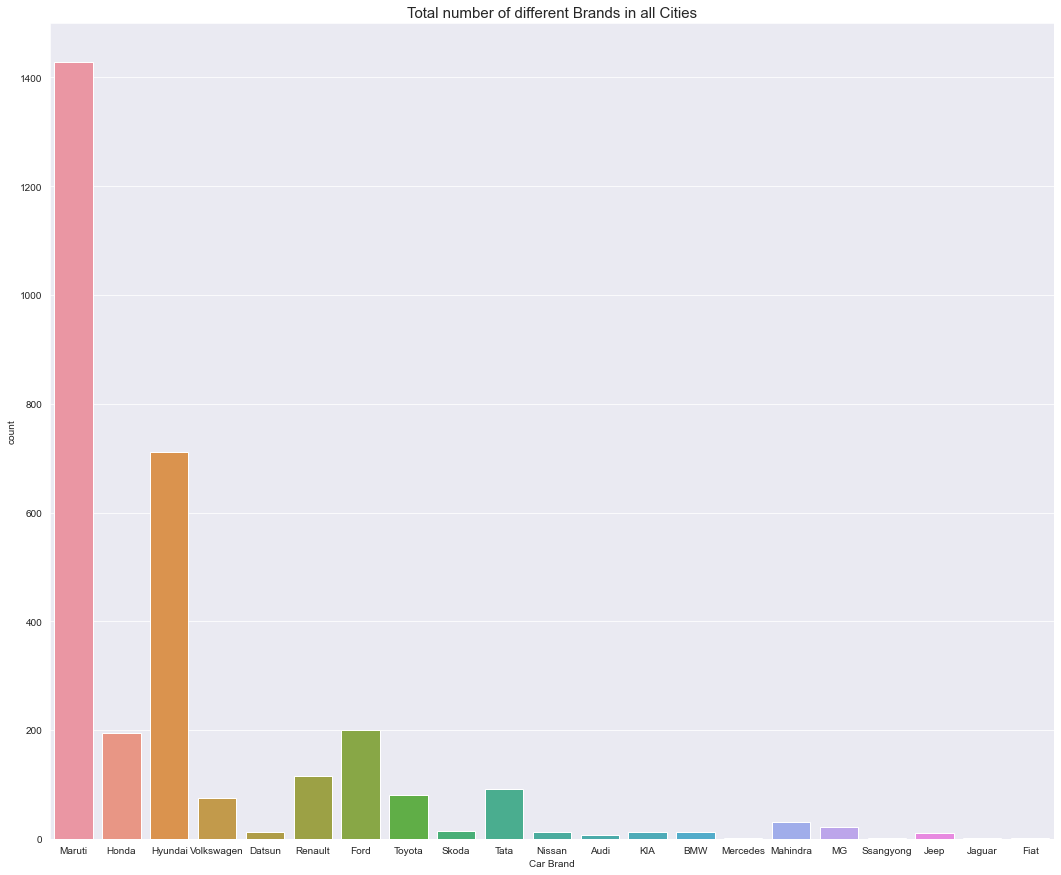

In [25]:
plt.figure(figsize=(18,15))
sns.countplot(df['Car Brand'])
plt.title("Total number of different Brands in all Cities",fontsize=15)
plt.show()

###  Total no. of different Car Brands in Hyderabad

In [26]:
hyd_city = df.loc[(df['Location'] == 'Hyderabad')]
hyd_brands = hyd_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

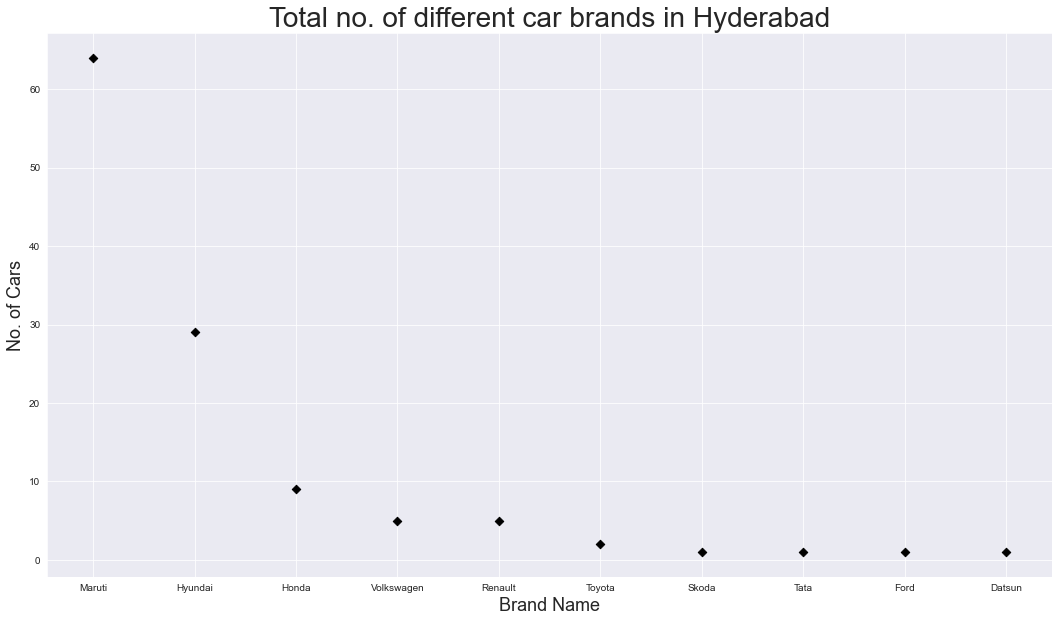

In [27]:
plt.figure(figsize=(18,10))
plt.scatter('Brand','Count',data=hyd_brands,color='k',marker='D')
plt.title("Total no. of different car brands in Hyderabad",fontsize=28)
plt.xlabel("Brand Name", fontsize = 18)
plt.ylabel("No. of Cars", fontsize =18)
plt.show()

### Total no. of different Car Brands in Delhi

In [28]:
del_city = df.loc[(df['Location'] == 'Delhi')]
del_brands = del_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

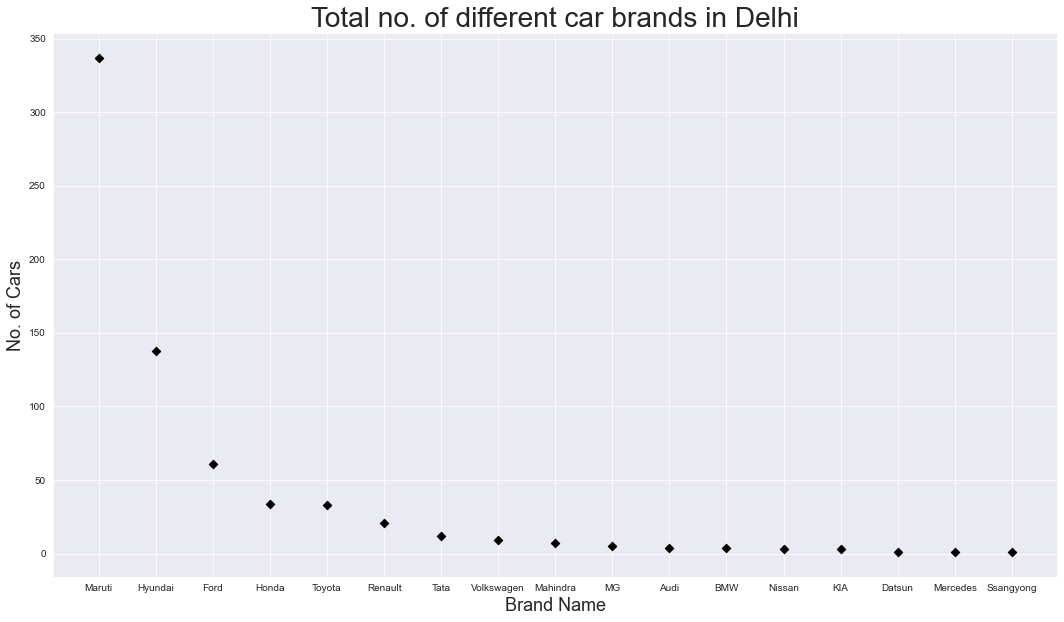

In [29]:
plt.figure(figsize=(18,10))
plt.scatter('Brand','Count',data=del_brands,color='k',marker='D')
plt.title("Total no. of different car brands in Delhi",fontsize=28)
plt.xlabel("Brand Name", fontsize = 18)
plt.ylabel("No. of Cars", fontsize =18)
plt.show()

### Total no. of different Car Brands in Mumbai

In [30]:
mum_city = df.loc[(df['Location'] == 'Mumbai')]
mum_brands = mum_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

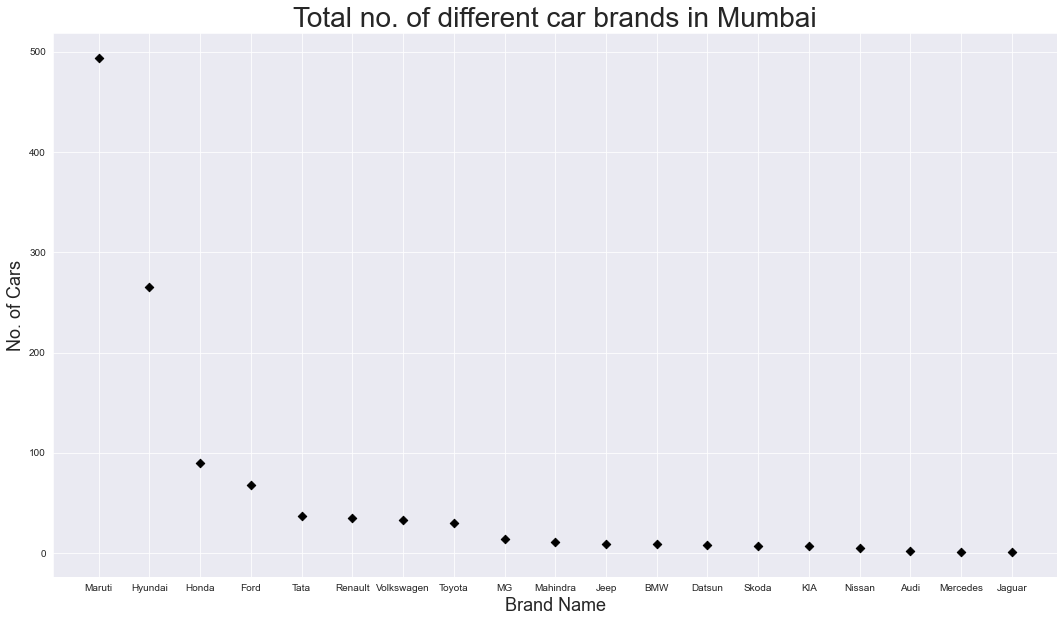

In [31]:
plt.figure(figsize=(18,10))
plt.scatter('Brand','Count',data=mum_brands,color='k',marker='D')
plt.title("Total no. of different car brands in Mumbai",fontsize=28)
plt.xlabel("Brand Name", fontsize = 18)
plt.ylabel("No. of Cars", fontsize =18)
plt.show()

### Total no. of different Car Brands in Bangalore

In [32]:
bangalore_city = df.loc[(df['Location'] == 'Bangalore')]
bangalore_brands = bangalore_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

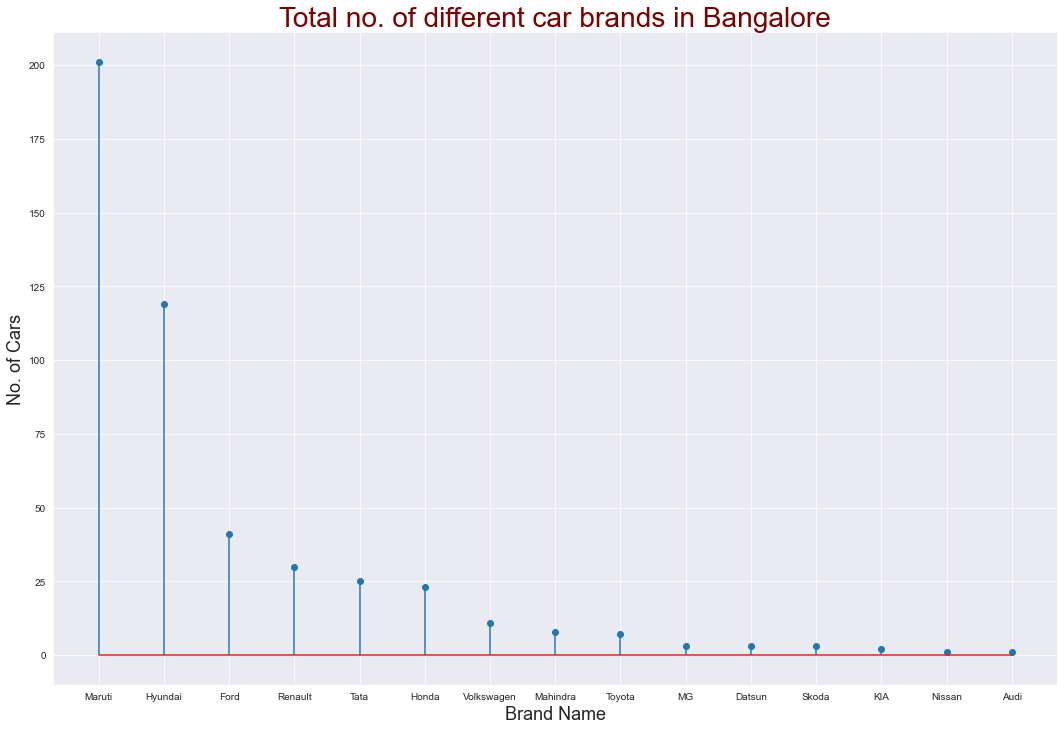

In [30]:
plt.figure(figsize=(18,12))
plt.stem('Brand','Count',data=bangalore_brands)
plt.title("Total no. of different car brands in Bangalore",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18)
plt.ylabel("No. of Cars", fontsize = 18)
plt.show()

### Total no. of different Car Brands in Chennai

In [31]:
chennai_city = df.loc[(df['Location'] == 'Chennai')]
chennai_brands = chennai_city['Car Brand'].value_counts().sort_values(ascending = True).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

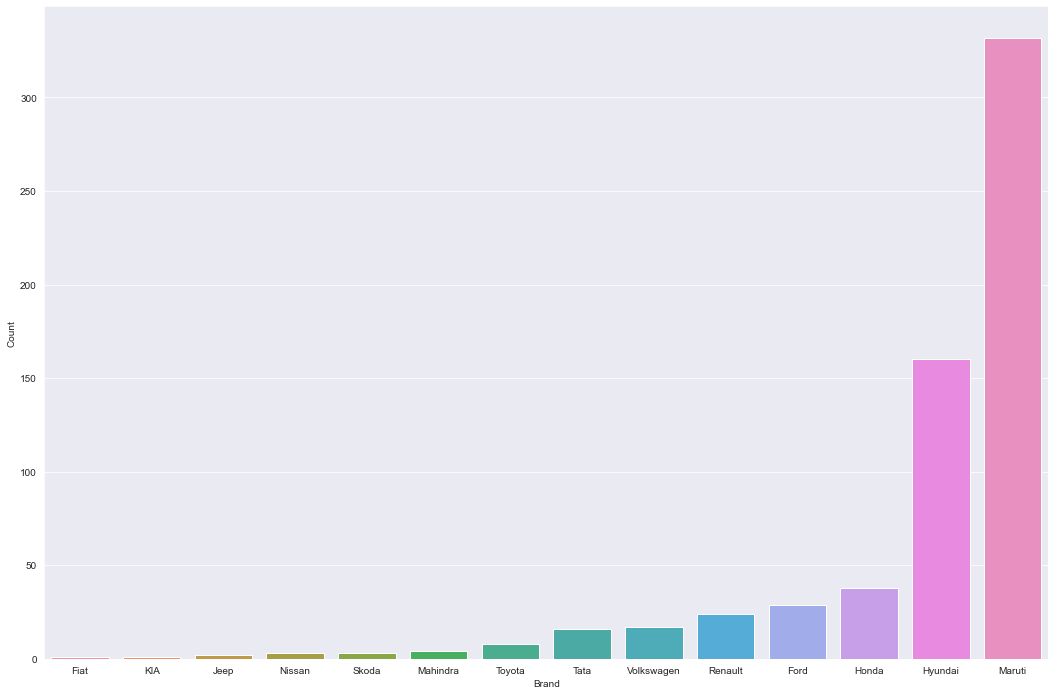

In [32]:
plt.figure(figsize=(18,12))
sns.barplot(x ='Brand',y='Count',data=chennai_brands)
plt.show()

# Number of Cars based on Fuel type in all cities

In [33]:
fuel_type = df.groupby(by=['Fuel'])['Location'].count().sort_values(ascending=True).reset_index().rename(columns={'Location':'Count'})

In [34]:
fuel_type

,Fuel,Count
0,Petrol + LPG,1
1,Petrol + CNG,33
2,Diesel,778
3,Petrol,2222


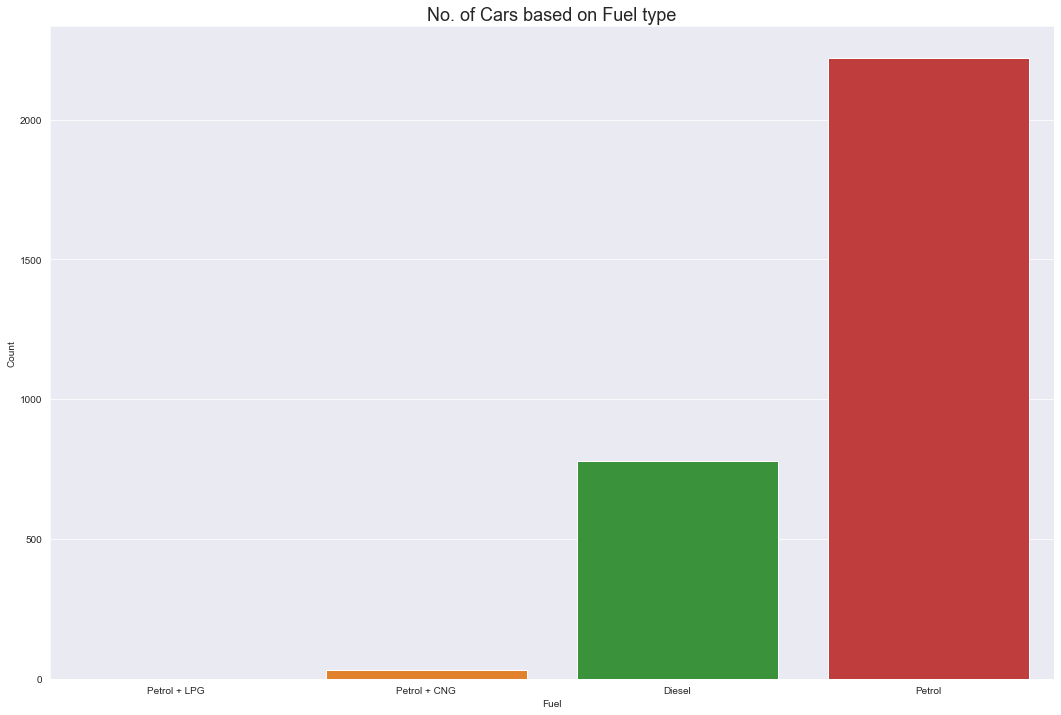

In [35]:
plt.figure(figsize=(18,12))
sns.barplot(x ='Fuel',y='Count',data=fuel_type)
plt.title("No. of Cars based on Fuel type",fontsize=18)
plt.show()

# No. of Cars based on Fuel type in different Cities

In [36]:
fuel_location = df.groupby(by=['Location','Fuel'])['Gear'].count().reset_index().rename(columns={'Gear':'Count','Count':'Fuel'})
fuel_location = fuel_location.sort_values(by=['Location','Count'],ascending=True).reset_index()
fuel_location = fuel_location.drop('index',axis=1)

In [37]:
fuel_location

,Location,Fuel,Count
0,Bangalore,Petrol + LPG,1
1,Bangalore,Diesel,56
2,Bangalore,Petrol,421
3,Chennai,Diesel,71
4,Chennai,Petrol,567
5,Delhi,Petrol + CNG,11
6,Delhi,Diesel,308
7,Delhi,Petrol,355
8,Hyderabad,Diesel,20
9,Hyderabad,Petrol,98


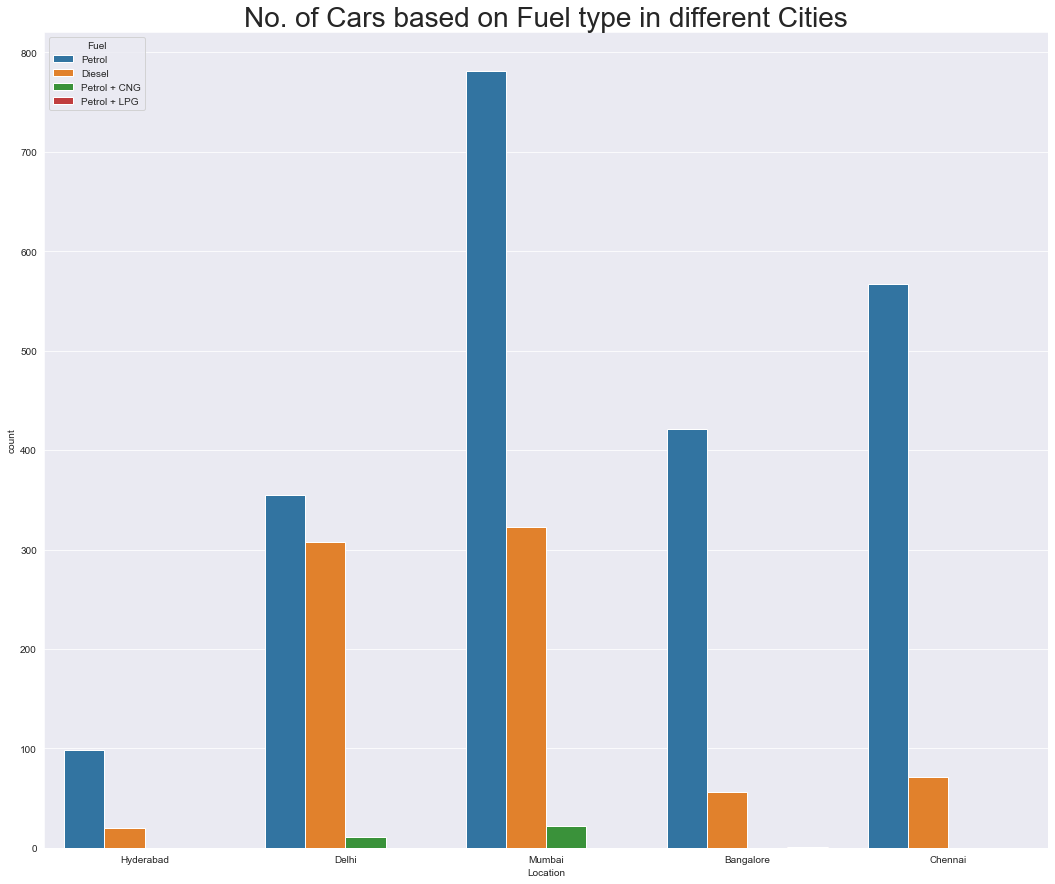

In [38]:
plt.figure(figsize=(18,15))
sns.countplot(x = 'Location',hue='Fuel',data=df)
plt.title("No. of Cars based on Fuel type in different Cities",fontsize=28)
plt.show()

# No. of cars in different Cities based on Model Year

In [39]:
model_year = df.groupby(by=['Location','Model Year'])['Gear'].count().reset_index().rename(columns={'Gear':'Count','Count':'Model Year'})
model_year = model_year.sort_values(by=['Location','Count'],ascending=True).reset_index()
model_year = model_year.drop('index',axis=1)

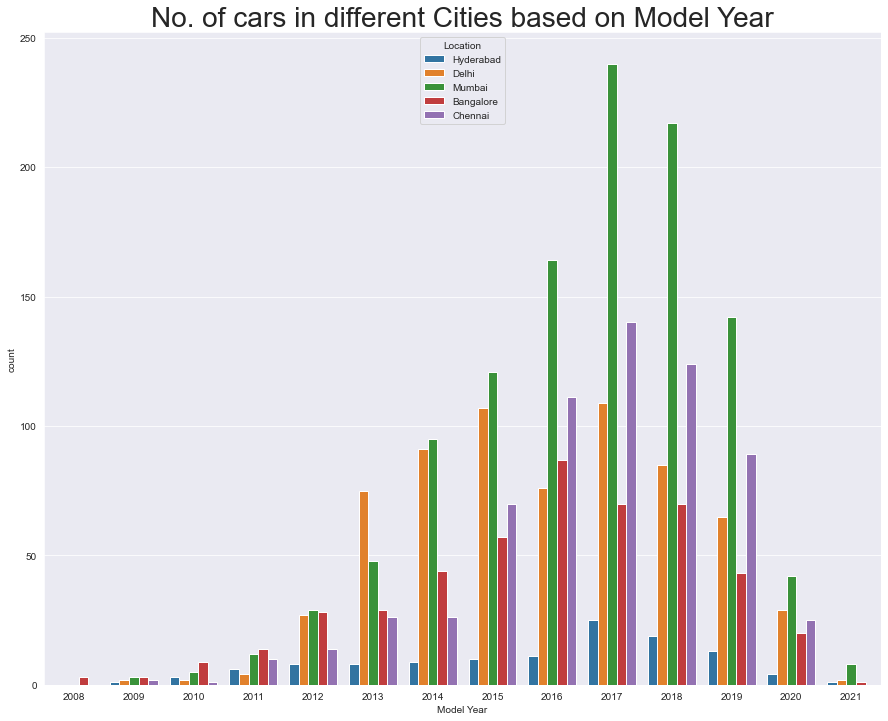

In [40]:
plt.figure(figsize=(15,12))
sns.countplot(x = 'Model Year',hue='Location',data=df)
plt.title("No. of cars in different Cities based on Model Year",fontsize=28)
plt.show()

# No. of Cars in different cities based on Gear

In [41]:
location_gear = df.groupby(by=['Location','Gear'])['Ownership'].count().reset_index().rename(columns={'Ownership':'Count'})
location_gear

,Location,Gear,Count
0,Bangalore,['Automatic'],89
1,Bangalore,['Manual'],379
2,Bangalore,[],10
3,Chennai,['Automatic'],103
4,Chennai,['Manual'],518
5,Chennai,[],17
6,Delhi,['Automatic'],66
7,Delhi,['Manual'],597
8,Delhi,[],11
9,Hyderabad,['Automatic'],19


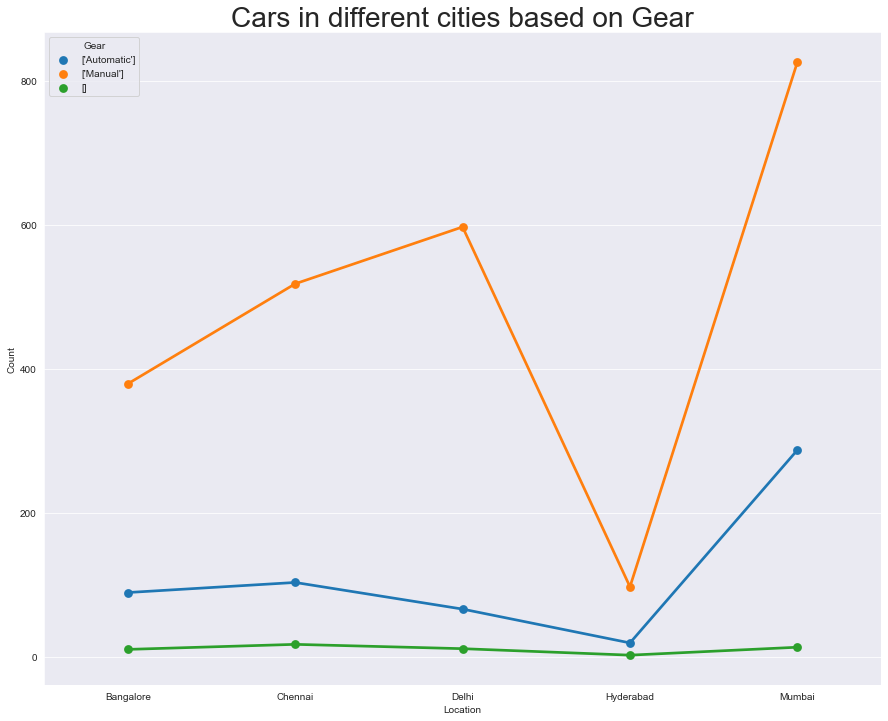

In [42]:
plt.figure(figsize=(15,12))
sns.pointplot(x='Location',y='Count',hue='Gear',data=location_gear)
plt.title("Cars in different cities based on Gear",fontsize=28)
plt.show()

# No. of Cars in different cities based on Ownership

In [43]:
location_owner = df.groupby(by=['Location','Ownership'])['Gear'].count().reset_index().rename(columns={'Gear':'Count'})
location_owner

,Location,Ownership,Count
0,Bangalore,1,345
1,Bangalore,2,118
2,Bangalore,3,14
3,Bangalore,4,1
4,Chennai,1,500
5,Chennai,2,121
6,Chennai,3,16
7,Chennai,4,1
8,Delhi,1,558
9,Delhi,2,110


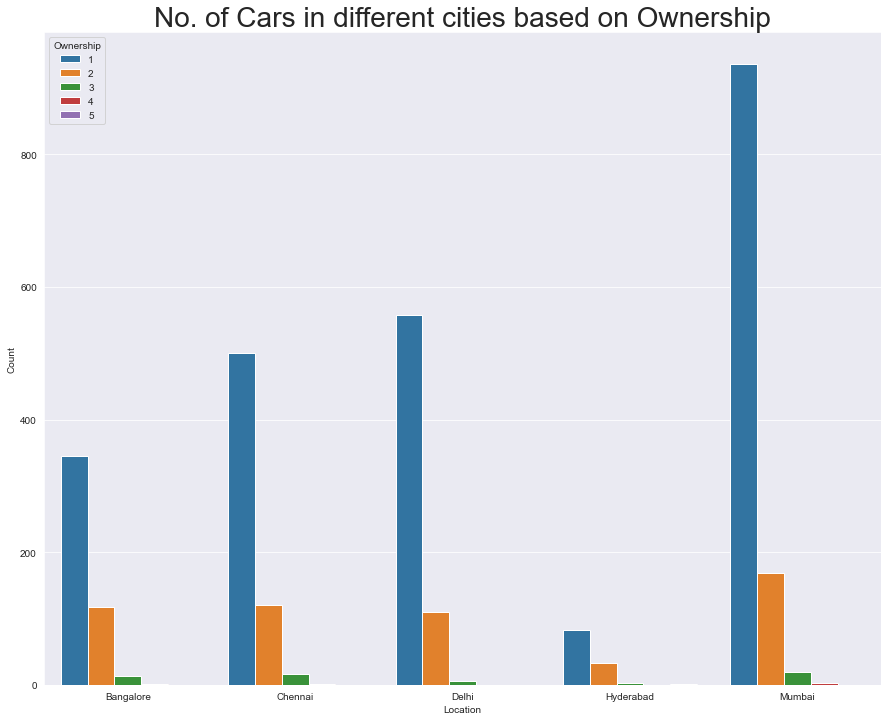

In [44]:
plt.figure(figsize=(15,12))
sns.barplot(x='Location',y='Count',data=location_owner,hue='Ownership')
plt.title("No. of Cars in different cities based on Ownership",fontsize=28)
plt.show()

In [45]:
df['Car Brand'].unique()

array(['Maruti', 'Honda', 'Hyundai', 'Volkswagen', 'Datsun', 'Renault',
       'Ford', 'Toyota', 'Skoda', 'Tata', 'Nissan', 'Audi', 'KIA', 'BMW',
       'Mercedes', 'Mahindra', 'MG', 'Ssangyong', 'Jeep', 'Jaguar',
       'Fiat'], dtype=object)

In [46]:
df['Car Brand'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Maruti
1         Honda
2        Maruti
3        Maruti
4       Hyundai
         ...   
3029     Maruti
3030     Maruti
3031      Skoda
3032    Renault
3033     Maruti
Name: Car Brand, Length: 3034, dtype: object>

In [47]:
df

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Maruti,['BalenoZETA 1.2 K12'],621899,2016,Hyderabad,Petrol,103354,['Manual'],1,13834
1,Honda,['Jazz1.2 V AT'],524199,2015,Hyderabad,Petrol,65571,['Automatic'],2,11661
2,Maruti,['SwiftZDI'],476699,2012,Hyderabad,Diesel,78819,['Manual'],2,10604
3,Maruti,['Alto 800LXI'],295499,2016,Hyderabad,Petrol,20215,['Manual'],2,6573
4,Hyundai,['i20SPORTZ 1.2 O'],378299,2010,Hyderabad,Petrol,79222,['Manual'],2,8415
...,...,...,...,...,...,...,...,...,...,...
3029,Maruti,['Alto 800LXI'],260499,2014,Chennai,Petrol,39845,['Manual'],3,5795
3030,Maruti,['CiazALPHA 1.3 DDIS SHVS'],691099,2017,Chennai,Diesel,93258,['Manual'],1,15373
3031,Skoda,['RapidStyle 1.5 TDI AT'],1077299,2018,Chennai,Diesel,64861,['Automatic'],1,23964
3032,Renault,['KwidRXT'],369799,2017,Chennai,Petrol,22293,['Manual'],1,8226


# Comparision of car brand count in different Cities

In [40]:
by_model = df.groupby(by=['Car Brand','Location'])['Price'].count().reset_index().rename(columns={'Price':'Count'})

In [41]:
by_model

,Car Brand,Location,Count
0,Audi,Bangalore,1
1,Audi,Delhi,4
2,Audi,Mumbai,2
3,BMW,Delhi,4
4,BMW,Mumbai,9
...,...,...,...
70,Volkswagen,Bangalore,11
71,Volkswagen,Chennai,17
72,Volkswagen,Delhi,9
73,Volkswagen,Hyderabad,5


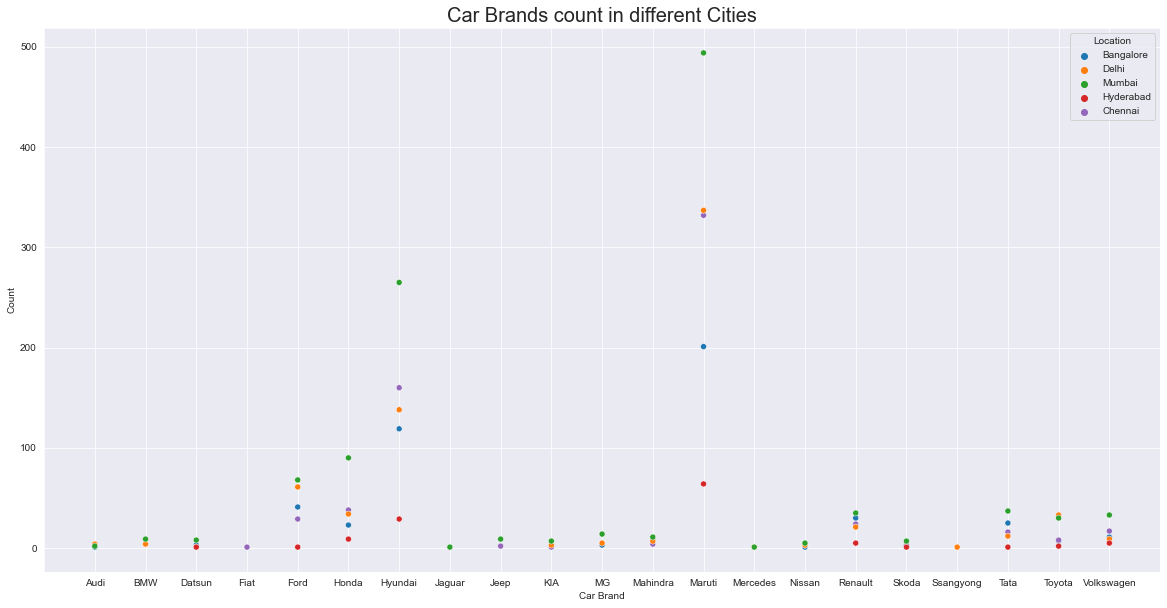

In [42]:
plt.figure(figsize=(20,10))
sns.scatterplot(y='Count',x='Car Brand',hue='Location',data=by_model)
plt.title("Car Brands count in different Cities", fontsize =20)
plt.show()

In [43]:
df

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Maruti,['BalenoZETA 1.2 K12'],621899,2016,Hyderabad,Petrol,103354,['Manual'],1,13834
1,Honda,['Jazz1.2 V AT'],524199,2015,Hyderabad,Petrol,65571,['Automatic'],2,11661
2,Maruti,['SwiftZDI'],476699,2012,Hyderabad,Diesel,78819,['Manual'],2,10604
3,Maruti,['Alto 800LXI'],295499,2016,Hyderabad,Petrol,20215,['Manual'],2,6573
4,Hyundai,['i20SPORTZ 1.2 O'],378299,2010,Hyderabad,Petrol,79222,['Manual'],2,8415
...,...,...,...,...,...,...,...,...,...,...
3029,Maruti,['Alto 800LXI'],260499,2014,Chennai,Petrol,39845,['Manual'],3,5795
3030,Maruti,['CiazALPHA 1.3 DDIS SHVS'],691099,2017,Chennai,Diesel,93258,['Manual'],1,15373
3031,Skoda,['RapidStyle 1.5 TDI AT'],1077299,2018,Chennai,Diesel,64861,['Automatic'],1,23964
3032,Renault,['KwidRXT'],369799,2017,Chennai,Petrol,22293,['Manual'],1,8226


# Label Encoding:

In [44]:
#importing Label Encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
df['Car Brand'] = le.fit_transform(df['Car Brand'])

In [46]:
df['Model'] = le.fit_transform(df['Model'])

In [47]:
df['Location'] = le.fit_transform(df['Location'])

In [48]:
df['Fuel'] = le.fit_transform(df['Fuel'])

In [49]:
df['Gear'] = le.fit_transform(df['Gear'])

In [50]:
df

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,12,57,621899,2016,3,1,103354,1,1,13834
1,5,328,524199,2015,3,1,65571,0,2,11661
2,12,473,476699,2012,3,0,78819,1,2,10604
3,12,15,295499,2016,3,1,20215,1,2,6573
4,6,607,378299,2010,3,1,79222,1,2,8415
...,...,...,...,...,...,...,...,...,...,...
3029,12,15,260499,2014,1,1,39845,1,3,5795
3030,12,87,691099,2017,1,0,93258,1,1,15373
3031,16,405,1077299,2018,1,0,64861,0,1,23964
3032,15,349,369799,2017,1,1,22293,1,1,8226


# Correlation:

In [51]:
df.corr()

,Car Brand,Model,Model Year,Location,Fuel,Gear,Ownership
Car Brand,1.000000,0.078219,0.046702,-0.017533,-0.041568,-0.010808,-0.041476
Model,0.078219,1.000000,-0.110138,-0.002373,-0.134076,0.112784,0.007327
Model Year,0.046702,-0.110138,1.000000,0.073831,0.108095,-0.132639,-0.181731
Location,-0.017533,-0.002373,0.073831,1.000000,-0.120397,-0.098900,-0.074950
Fuel,-0.041568,-0.134076,0.108095,-0.120397,1.000000,-0.043363,0.026760
Gear,-0.010808,0.112784,-0.132639,-0.098900,-0.043363,1.000000,-0.032463
Ownership,-0.041476,0.007327,-0.181731,-0.074950,0.026760,-0.032463,1.000000


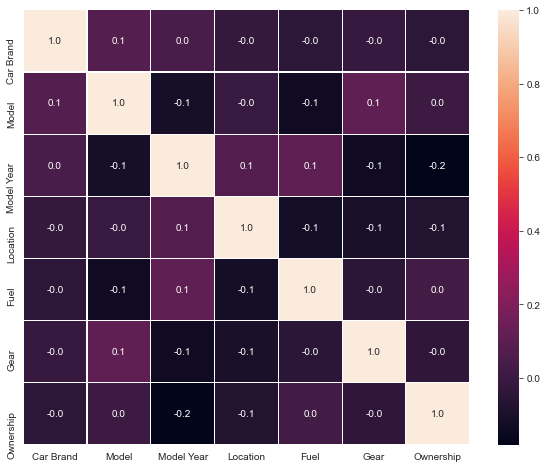

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Checking For Outliers:

In [53]:
X = df.drop(columns = ['Price'])
y = df['Price']

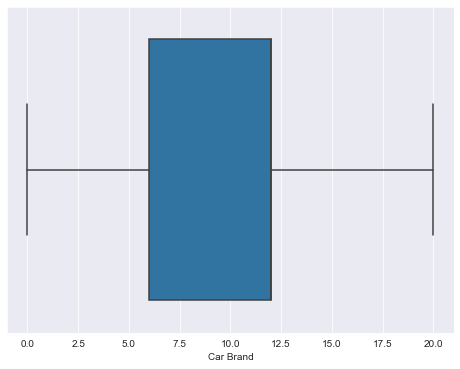

In [54]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Car Brand'])
plt.show()

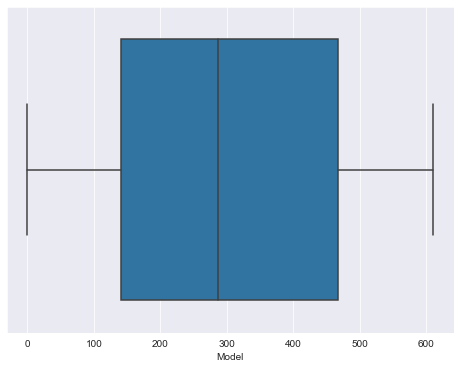

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Model'])
plt.show()

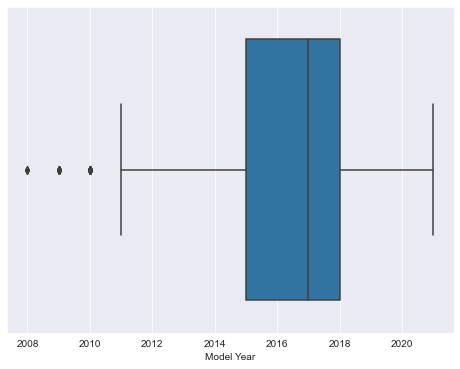

In [56]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Model Year'])
plt.show()

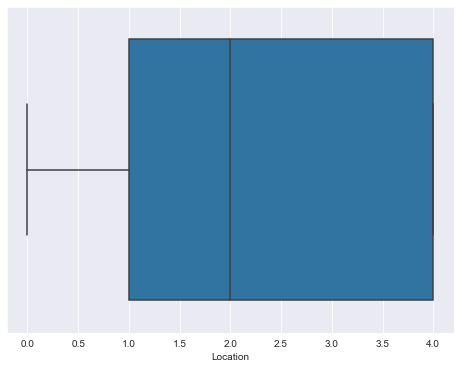

In [57]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Location'])
plt.show()

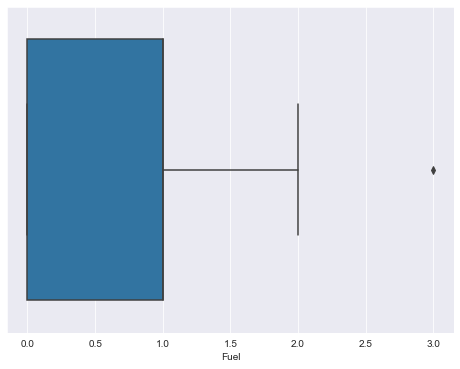

In [58]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Fuel'])
plt.show()

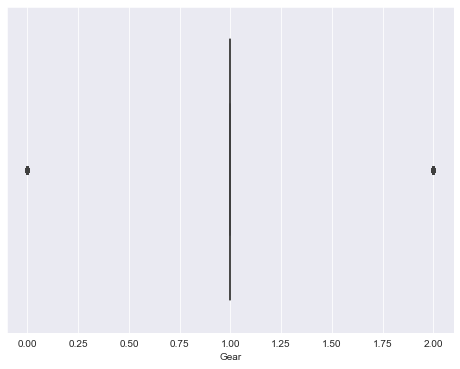

In [59]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Gear'])
plt.show()

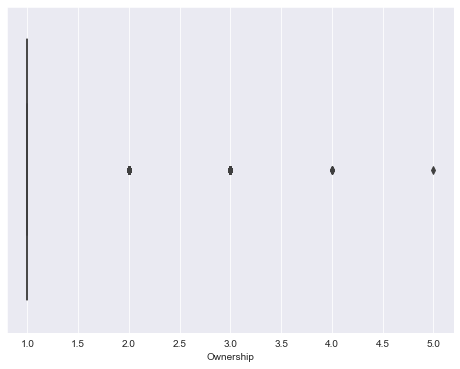

In [60]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Ownership'])
plt.show()

# Removing Outliers:

In [61]:
from scipy.stats import zscore
z = zscore

In [62]:
df1 =  X[['Ownership','Gear','Model Year']].copy()

In [63]:
Z = zscore(df1)

In [64]:
z_abs_score = np.abs(Z)

In [65]:
df2 = df1[(z_abs_score < 3).all(axis=1)]

In [66]:
df2.shape

(2959, 3)

In [67]:
df1.shape

(3034, 3)

In [68]:
dropindx = X.index.difference(df2.index)

In [69]:
df.drop(dropindx,inplace = True) #dropping the outlier Dataframe

In [70]:
df.shape

(2959, 10)

# Skewness:

In [71]:
df.skew()

Car Brand        0.202041
Model            0.035684
Price            2.202381
Model Year      -0.477701
Location        -0.076168
Fuel            -0.828273
Driven (Kms)     1.612460
Gear            -1.039605
Ownership        1.627382
EMI (monthly)    2.202381
dtype: float64

In [72]:
X.skew()

Car Brand        0.206121
Model            0.034507
Model Year      -0.577649
Location        -0.069799
Fuel            -0.786651
Driven (Kms)     1.592497
Gear            -1.028127
Ownership        2.150350
EMI (monthly)    2.198946
dtype: float64

# Plotting Skewness:

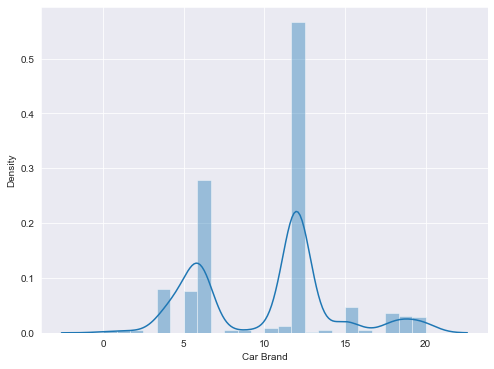

In [73]:
plt.figure(figsize=(8,6))
sns.distplot(df['Car Brand'])
plt.show()

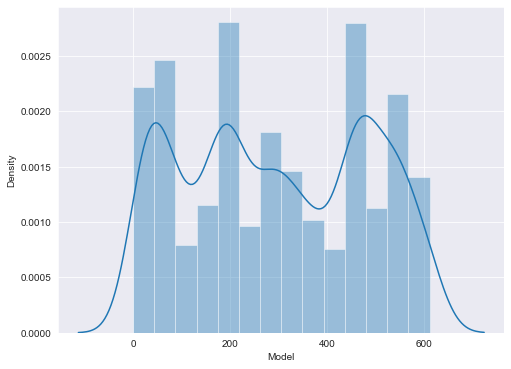

In [74]:
plt.figure(figsize=(8,6))
sns.distplot(df['Model'])
plt.show()

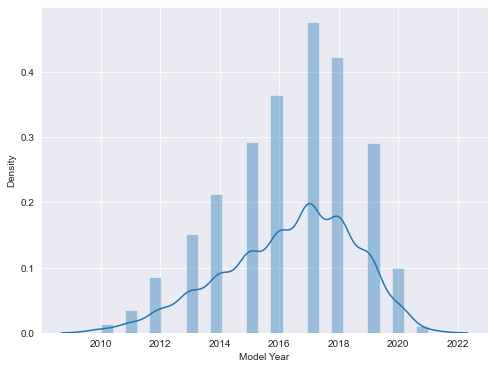

In [75]:
plt.figure(figsize=(8,6))
sns.distplot(df['Model Year'])
plt.show()

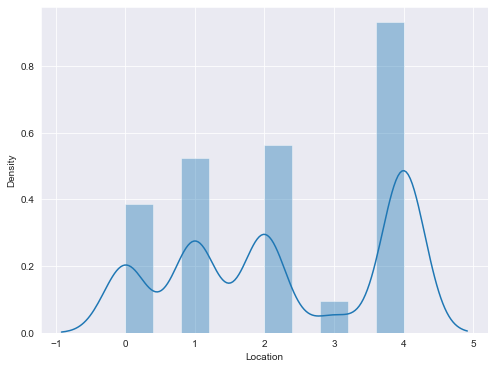

In [76]:
plt.figure(figsize=(8,6))
sns.distplot(df['Location'])
plt.show()

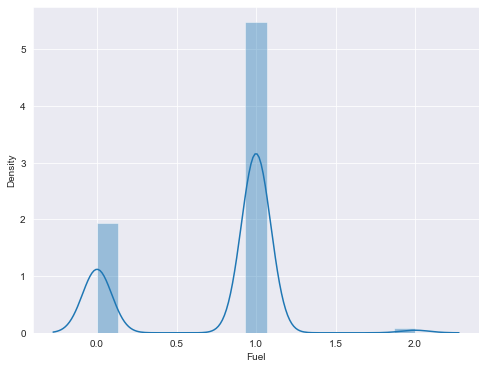

In [77]:
plt.figure(figsize=(8,6))
sns.distplot(df['Fuel'])
plt.show()

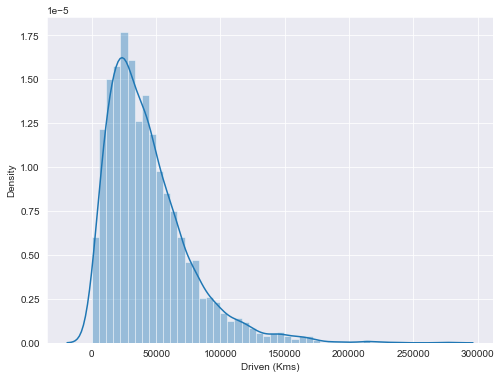

In [78]:
plt.figure(figsize=(8,6))
sns.distplot(df['Driven (Kms)'])
plt.show()

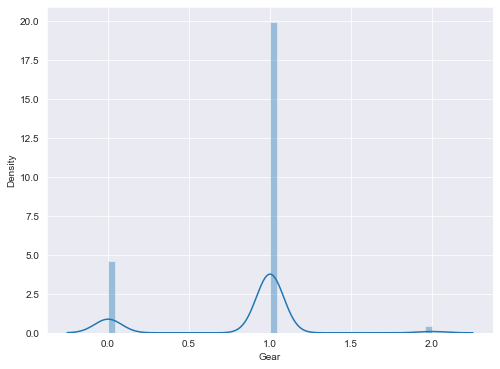

In [79]:
plt.figure(figsize=(8,6))
sns.distplot(df['Gear'])
plt.show()

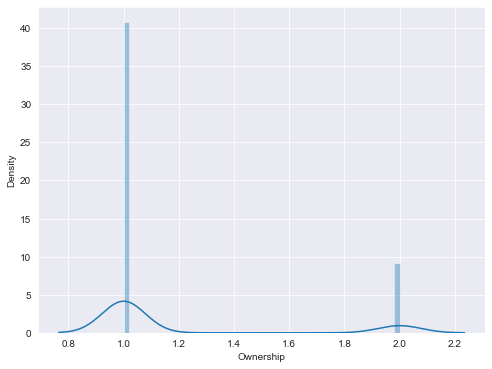

In [80]:
plt.figure(figsize=(8,6))
sns.distplot(df['Ownership'])
plt.show()

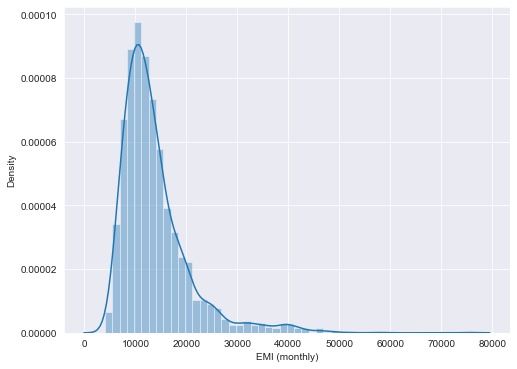

In [81]:
plt.figure(figsize=(8,6))
sns.distplot(df['EMI (monthly)'])
plt.show()

# Standerd Scaler Method:

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [84]:
scaled_X

array([[ 0.42987275, -1.29069206,  0.01097528, ...,  0.40185122,
        -0.47568303,  0.01100539],
       [-1.2132264 ,  0.16873452, -0.30848932, ..., -1.99548298,
         2.10224021, -0.30841746],
       [ 0.42987275,  0.94960852, -0.46380732, ...,  0.40185122,
         2.10224021, -0.4637925 ],
       ...,
       [ 0.42987275, -1.12913192,  0.23724908, ...,  0.40185122,
        -0.47568303,  0.23723263],
       [ 1.36878655,  0.58340554,  1.50006616, ..., -1.99548298,
        -0.47568303,  1.50007744],
       [ 1.1340581 ,  0.28182662, -0.81335457, ...,  0.40185122,
        -0.47568303, -0.81334959]])

# Principle Component Analysis:

In [85]:
from sklearn.decomposition import PCA
pca = PCA()

In [86]:
data_pca = pca.fit(scaled_X)

In [87]:
data_pca.explained_variance_ratio_

array([2.56080899e-01, 1.71107189e-01, 1.12156798e-01, 1.01262173e-01,
       9.87489437e-02, 9.04903260e-02, 7.95275726e-02, 5.05315853e-02,
       4.00945138e-02, 9.04401110e-11])

In [88]:
var_component = np.cumsum(data_pca.explained_variance_ratio_)*100
var_component

array([ 25.60808993,  42.71880879,  53.93448857,  64.06070584,
        73.93560022,  82.98463282,  90.93739008,  95.99054861,
        99.99999999, 100.        ])

In [89]:
#finding cumulative variance
k = np.argmax(var_component>99)
print('Number of components explaining 99% variance:',k)

Number of components explaining 99% variance: 8


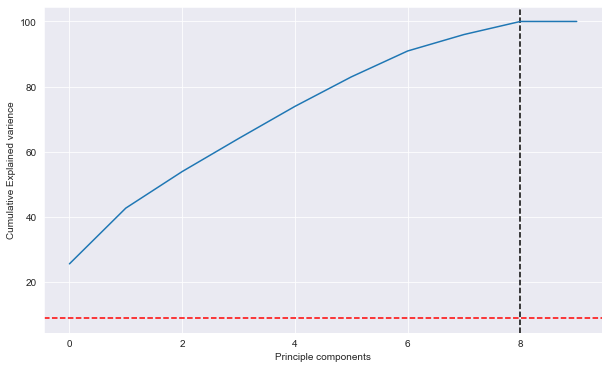

In [90]:
#ploting cumulative variance
plt.figure(figsize=(10,6))
plt.ylabel('Cumulative Explained varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color='k',linestyle='--')
plt.axhline(y=9, color='r',linestyle='--')
plt.plot(var_component)
plt.show()

# Model Building:

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Spliting Data:

In [172]:
X = df.drop(columns = ['Price'])
y = df['Price']

In [174]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=i)
    model = LinearRegression()
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9999999985465633  on Random_state  56


In [175]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X, y, test_size=0.30, random_state=56)

# Linear Regression

In [184]:
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [185]:
Lr.score(X_train,y_train)

1.0

In [186]:
pred_Lr = Lr.predict(X_test)

In [187]:
print('R2_Score:',r2_score(y_test,pred_Lr))
print('MAE:',metrics.mean_absolute_error(y_test, pred_Lr))
print('MSE:',metrics.mean_squared_error(y_test, pred_Lr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_Lr)))

R2_Score: 1.0
MAE: 2.4620267386372026e-10
MSE: 9.799637034810563e-20
RMSE: 3.1304371954745493e-10


# DecisionTreeRegressor

In [199]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train,y_train)

DecisionTreeRegressor()

In [200]:
dtc.score(X_train,y_train)

1.0

In [201]:
pred_dtc = dtc.predict(X_test)

In [202]:
print('R2_Score:',r2_score(y_test,pred_dtc))
print('MAE:',metrics.mean_absolute_error(y_test, pred_dtc))
print('MSE:',metrics.mean_squared_error(y_test, pred_dtc))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_dtc)))

R2_Score: 0.9835683436467052
MAE: 2749.2105855855857
MSE: 1766944785.1362612
RMSE: 42035.04234726381


# KNeighborsRegressor

In [219]:
knn = KNeighborsRegressor()

In [220]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
pred_knn = knn.predict(X_test)

In [222]:
print('R2_Score:',r2_score(y_test,pred_knn))
print('MAE:',metrics.mean_absolute_error(y_test, pred_knn))
print('MSE:',metrics.mean_squared_error(y_test, pred_knn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_knn)))

R2_Score: 0.8429284982891683
MAE: 85010.69707207207
MSE: 16890364846.622747
RMSE: 129962.93643428787


# RandomForestRegressor

In [209]:
rf = RandomForestRegressor()

In [210]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [211]:
rf.score(X_train,y_train)

0.9999714695025741

In [212]:
pred_rf = rf.predict(X_test)

In [213]:
print('R2_Score:',r2_score(y_test,pred_rf))
print('MAE:',metrics.mean_absolute_error(y_test, pred_rf))
print('MSE:',metrics.mean_squared_error(y_test, pred_rf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))

R2_Score: 0.9843984690010383
MAE: 2530.5822072072074
MSE: 1677678941.552928
RMSE: 40959.47926369338


# AdaBoostRegressor

In [215]:
ad = AdaBoostRegressor()
ad.fit(X_train,y_train)

AdaBoostRegressor()

In [216]:
ad.score(X_train,y_train)

0.9918299534724435

In [217]:
pred_ad = ad.predict(X_test)

In [218]:
print('R2_Score:',r2_score(y_test,pred_ad))
print('MAE:',metrics.mean_absolute_error(y_test, pred_ad))
print('MSE:',metrics.mean_squared_error(y_test, pred_ad))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ad)))

R2_Score: 0.978032756231073
MAE: 23486.08486689315
MSE: 2362202932.362304
RMSE: 48602.499239877616


# GradientBoostingRegressor

In [223]:
grd =  GradientBoostingRegressor()
grd.fit(X_train,y_train)

GradientBoostingRegressor()

In [224]:
grd.score(X_train,y_train)

0.9999353988391735

In [226]:
pred_grd = grd.predict(X_test)

In [227]:
print('R2_Score:',r2_score(y_test,pred_grd))
print('MAE:',metrics.mean_absolute_error(y_test, pred_grd))
print('MSE:',metrics.mean_squared_error(y_test, pred_grd))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_grd)))

R2_Score: 0.9873620759126852
MAE: 3685.7717838249187
MSE: 1358993492.8593624
RMSE: 36864.52892496203


# XGBRegressor

In [229]:
xg =  XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [230]:
xg.score(X_train,y_train)

0.9999929366369495

In [233]:
pred_xg = xg.predict(X_test)

In [234]:
print('R2_Score:',r2_score(y_test,pred_xg))
print('MAE:',metrics.mean_absolute_error(y_test, pred_xg))
print('MSE:',metrics.mean_squared_error(y_test, pred_xg))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_xg)))

R2_Score: 0.9862582734370778
MAE: 4017.365938203829
MSE: 1477688649.7054315
RMSE: 38440.716040488


# SVR

In [235]:
sv = SVR()
sv.fit(X_train,y_train)

SVR()

In [239]:
pred_sv = sv.predict(X_test)

In [240]:
print('R2_Score:',r2_score(y_test,pred_sv))
print('MAE:',metrics.mean_absolute_error(y_test, pred_sv))
print('MSE:',metrics.mean_squared_error(y_test, pred_sv))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_sv)))

R2_Score: -0.08595045212027808
MAE: 210364.2432202676
MSE: 116775475766.66196
RMSE: 341724.26862407936


# Cross Validation Score

In [241]:
# Checking cv score for Linear Regression
print(cross_val_score(Lr,X,y,cv=5).mean())

0.9999999976897763


In [244]:
# Checking cv score for DecisiontressRegression
print(cross_val_score(dtc,X,y,cv=5).mean())

0.9978963896158348


In [246]:
# Checking cv score for randomforestRegression
print(cross_val_score(rf,X,y,cv=5).mean())

0.9966917937662778


In [247]:
# Checking cv score for AdaBoostRegressor
print(cross_val_score(ad,X,y,cv=5).mean())

0.982066125813357


In [248]:
# Checking cv score for GradientBoostingRegressor
print(cross_val_score(grd,X,y,cv=5).mean())

0.9978823937502662


In [251]:
#Checking cv score for svr
print(cross_val_score(sv,X,y,cv=5).mean())

-0.09799840899638257


### All the models performances are near to each others. Since, in most of the scenarios RandomForestRegressor is best, We will tune parameters for it and check its performance

# HyperParameter Tuning:

In [252]:
params  = {'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]}

In [253]:
GCV = GridSearchCV(RandomForestRegressor(),param_grid = params, scoring ='r2', cv=5)

In [256]:
GCV.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [300, 500, 700, 1000, 2100]},
             scoring='r2')

In [257]:
GCV.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 500}

In [259]:
final_model = RandomForestRegressor(n_estimators = 1000, max_depth = 15, max_features = 'auto', min_samples_split = 2)

final_model.fit(X,y)

RandomForestRegressor(max_depth=15, n_estimators=1000)

In [260]:
final_model.score(X,y)

0.9993966105577493

# Saving

In [300]:
import joblib
joblib.dump(final_model,'UsedCarPricePrediction.pkl')

['UsedCarPricePrediction.pkl']

# !!!! THANK YOU !!!!